# Несбалансированные данные (Imbalanced Data)

---

[Imbalanced Data](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data)

[Dealing with Imbalanced Data](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18)

[A Gentle Introduction to Imbalanced Classification](https://machinelearningmastery.com/what-is-imbalanced-classification/)

[8 Tactics to Combat Imbalanced Classes in Your Machine Learning Dataset](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/)

[Dealing with Imbalanced Data](https://medium.com/digital-catapult/dealing-with-imbalanced-data-8b21e6deb6cd)

[Imbalanced Learning in Banking](https://medium.com/analytics-ai-swedbank/imbalanced-learning-in-banking-1bd3868a496d)

[Accuracy paradox](https://en.wikipedia.org/wiki/Accuracy_paradox)

[Precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall)

[Classification with Imbalanced Datasets](https://sci2s.ugr.es/imbalanced)

[Classification Accuracy is Not Enough: More Performance Measures You Can Use](https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/)

[Resampling (statistics)](https://en.wikipedia.org/wiki/Resampling_(statistics))

[Oversampling and undersampling in data analysis](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis)

[Районированная выборка](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D0%B9%D0%BE%D0%BD%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D0%B0%D1%8F_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B0)

[Наивный байесовский классификатор](https://ru.wikipedia.org/wiki/%D0%9D%D0%B0%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9_%D0%B1%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80)

[Imbalanced Learning: Foundations, Algorithms, and Applications](https://www.amazon.com/dp/1118074629/ref=as_li_ss_tl?&linkCode=sl1&tag=inspiredalgor-20&linkId=615e87a9105582e292ad2b7e2c7ea339&language=en_US)

[Learning from Imbalanced Data Sets](https://www.amazon.com/Learning-Imbalanced-Data-Alberto-Fern%C3%A1ndez/dp/3319980734/ref=as_li_ss_tl?keywords=Learning+from+Imbalanced+Data+Sets&qid=1568679479&s=books&sr=1-1&linkCode=sl1&tag=inspiredalgor-20&linkId=214f8d8144c94e7f48543e0200abdbdf&language=en_US)

[How to Develop a Framework to Spot-Check Machine Learning Algorithms in Python](https://machinelearningmastery.com/spot-check-machine-learning-algorithms-in-python/)

[Using Under-Sampling Techniques for Extremely Imbalanced Data](https://medium.com/dataman-in-ai/sampling-techniques-for-extremely-imbalanced-data-part-i-under-sampling-a8dbc3d8d6d8)

[The 5 Most Useful Techniques to Handle Imbalanced Datasets](https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html)

---

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install pandas matplotlib numpy seaborn -y

In [3]:
# !pip install imbalanced-learn

In [4]:
import numpy as np

np.__version__

'1.19.2'

In [5]:
import pandas as pd

pd.__version__

'1.2.3'

In [6]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [7]:
import seaborn as sns

sns.__version__

'0.11.1'

In [8]:
import imblearn

imblearn.__version__

'0.8.0'

In [9]:
sns.set_style("whitegrid")

## Загрузка данных

[Источник (Telco Customer Churn)](https://www.kaggle.com/blastchar/telco-customer-churn).

In [10]:
df = pd.read_csv('./../../data/Telco-Customer-Churn.csv', index_col='customerID')

# показать все колонки
pd.options.display.max_columns = None

# изменить формат отображения с помощью средства форматирования
# (float без E, а 2 знаков после запятой)
# (для удобства чтения)
pd.options.display.float_format = '{:.2f}'.format

# отобразить первые 5 и последние 5 строк
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [11]:
df[df == ' '].count()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df.TotalCharges.replace(' ', np.nan, inplace=True)

In [13]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
df.TotalCharges = df.TotalCharges.astype('float')

In [15]:
# получить сведения о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

### В чем проблема?
Вы работаете над своим набором данных. Вы создаете модель классификации и сразу получаете точность 90%.

Фантастически!

Вы погружаетесь немного глубже и обнаруживаете, что 90% данных принадлежат одному классу. Черт!

Это пример несбалансированного набора данных и разочаровывающих результатов, которые он может вызвать.

Вы чувствуете сильное разочарование, когда обнаруживаете, что данные имеют несбалансированные классы и все замечательные результаты, которые, как вы думали, вы получаете, оказываются ложью.

## Что такое несбалансированные данные (Imbalanced Data)

Набор классификационных данных с искаженными пропорциями классов (категорий) называется **несбалансированным**.

Классы (категории), составляющие большую часть набора данных, называются классами большинства (**majority classes**). 

Те, кто составляют меньшую долю, относятся к классам меньшинств (**minority class**).

Что считается несбалансированным? Ответ может варьироваться от умеренного до экстремального.

<img src="images/imbalance_degree.png" height=300 width=300>


**Большинство наборов классификационных данных не имеют точно одинаковое количество экземпляров в каждом классе, но небольшая разница часто не имеет значения.**

Есть задачи, когда дисбаланс классов не просто распространен, это ожидается.

- Например, в наборах данных, которые характеризуют мошеннические транзакции. Подавляющее большинство транзакций будет в классе "Не мошенничество", а очень небольшое меньшинство будет в классе "Мошенничество".

- Другим примером являются наборы данных о клиентах, где подавляющее большинство клиентов пользуются услугами (класс "без оттока"), а небольшое меньшинство отменяет свою подписку (класс "отток").

### Парадокс точности (Accuracy paradox)

Парадокс точности — это парадоксальный вывод о том, что точность (accuracy) не является хорошим показателем для прогнозных моделей при классификации. 

Это связано с тем, что простая модель может иметь высокий уровень точности, но быть слишком грубой, бесполезной.

**Например, если частота случаев категории `A` является доминирующей и обнаруживается в `99%` случаев, то прогнозирование того, что каждый случай относится к категории `A`, будет иметь точность `99%`.**

Основная проблема заключается в том, что существует классовый дисбаланс между "положительным" и "отрицательным" классами.

В таких случаях лучший выбор — это ***[precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall)**.

## Графическое представление несбалансированных данных (Imbalanced Data)

### Полезные функции

In [16]:
def plot_cat_count_df(cdf: pd.DataFrame, h_count=2):
    """
    Функция для рисования countplot для DataFrame
    """
        
    # количество графиков (столбцов в df)
    cols_len = len(cdf.columns.tolist())

    # сколько графиков в неполной строке
    residue = cols_len%h_count
    
    # количество строк в сетке графиков
    v_count = cols_len//h_count + (1 if residue else 0)

    # создать сетку из графиков размером (v_count, h_count)
    fig, axs = plt.subplots(v_count, h_count, figsize=(20, v_count * 3.5))
    
    # получить цветовую карту с учетом количества графиков
    cmap = plt.get_cmap('hsv', cols_len + 1)

    # для каждого столбца нарисовать график
    for index, column_name in enumerate(cdf):
        # индивидуальный цвет для каждого графика
        plot_color = cmap(index/cols_len)

        # получить оси для текущего графика (в сетке)
        ax = axs[index//h_count][index%h_count]

        # создать countplot
        g = sns.countplot(data=cdf, 
                          x=column_name, 
                          ax=ax, 
                          color=plot_color)
        
        # повернуть подписи категорий на 45 градусов
        g.set_xticklabels(g.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right')
        
        # отключить подпись оси x и y
        ax.xaxis.label.set_visible(False)
        ax.yaxis.label.set_visible(False)
        
        # наименование графика справа цветом графика
        ax.set_title(column_name, 
                     loc='right', 
                     fontsize=15, 
                     color=plot_color)
        
        # включить сетку на графике
        ax.grid()

        # сколько всего записей для всех категорий в колонке
        total = len(cdf[column_name])
        
        print(f"{total} ({column_name})")
        
        # для каждого столбца на графике сверху добавить процент
        for p in ax.patches:
            # вычислить процент, который соответствует текущему столбцу
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            
            # начало (слева) столбца на графике по оси x
            x_pos = p.get_x()
            
            # верх столбца на графике по оси x
            y_pos = p.get_y() + p.get_height()
            
            # добавить процент в качестве аннотации к столбцу
            ax.annotate(percentage, 
                        xy=(x_pos, y_pos), 
                        fontsize=15)

    # расстояние между графиками по горизонтали и вертикали
    fig.subplots_adjust(hspace=1.5, wspace=0.2)

    # если последняя строка в сетке заполнена не до конца
    if residue:
        # удалить все незаполненные графики
        for plot_h_idx in range(h_count-1, residue-1, -1):
            fig.delaxes(axs[v_count-1][plot_h_idx])

In [17]:
def plot_cat_count_s(cs: pd.Series):
    """
    Функция для рисования countplot для Series
    """
    
    # создать график (сетка 1x1)
    fig, ax = plt.subplots(1, 1, figsize=(6, 1.5))
    
    # получить цветовую карту с учетом количества графиков
    cmap = plt.get_cmap('hsv')
    
    # индивидуальный цвет для каждого графика
    plot_color = cmap(0)

    # создать countplot
    g = sns.countplot(x=cs, 
                      ax=ax, 
                      color=plot_color)

    # повернуть подписи категорий на 45 градусов
    g.set_xticklabels(g.get_xticklabels(), 
                      rotation=45, 
                      horizontalalignment='right')

    # отключить подпись оси x и y
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)

    # наименование графика справа цветом графика
    ax.set_title(cs.name, 
                 loc='right', 
                 fontsize=15, 
                 color=plot_color)

    # включить сетку на графике
    ax.grid()

    # сколько всего записей для всех категорий в колонке
    total = len(cs)
    
    print(f"{total} ({cs.name})")

    # для каждого столбца на графике сверху добавить процент
    for p in ax.patches:
        # вычислить процент, который соответствует текущему столбцу
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)

        # начало (слева) столбца на графике по оси x
        x_pos = p.get_x()

        # верх столбца на графике по оси x
        y_pos = p.get_y() + p.get_height()

        # добавить процент в качестве аннотации к столбцу
        ax.annotate(percentage, 
                    xy=(x_pos, y_pos), 
                    fontsize=15)

### Анализ графических данных

In [18]:
# выбрать столбцы НЕ содержащие числа
df_cat = df.select_dtypes(exclude=np.number)
df_cat

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
customerID,,,,,,,,,,,,,,,,
7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No


In [19]:
len(df_cat.columns)

16

7043 (gender)
7043 (Partner)
7043 (Dependents)
7043 (PhoneService)
7043 (MultipleLines)
7043 (InternetService)
7043 (OnlineSecurity)
7043 (OnlineBackup)
7043 (DeviceProtection)
7043 (TechSupport)
7043 (StreamingTV)
7043 (StreamingMovies)
7043 (Contract)
7043 (PaperlessBilling)
7043 (PaymentMethod)
7043 (Churn)


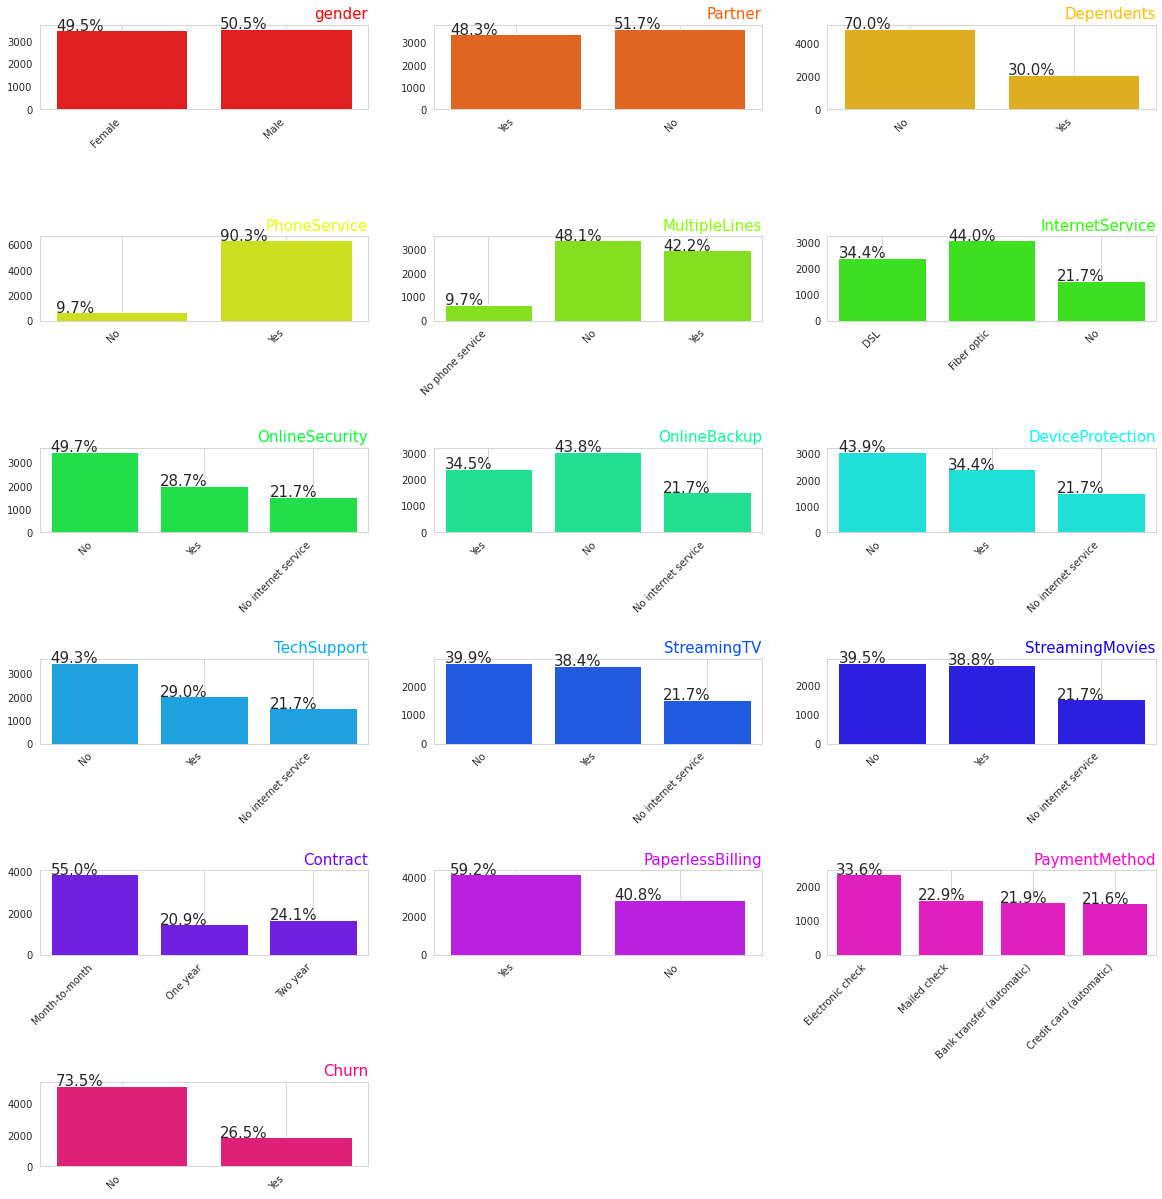

In [20]:
plot_cat_count_df(df_cat, h_count=3)

## Подготовка данных

In [21]:
# данные, на которых будет обучаться модель (=фичи, features)
X = df.iloc[:, :-1]
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45


In [22]:
# данные, которые модель должна научиться предсказывать
y = df.iloc[:, -1]
y

customerID
7590-VHVEG     No
5575-GNVDE     No
3668-QPYBK    Yes
7795-CFOCW     No
9237-HQITU    Yes
             ... 
6840-RESVB     No
2234-XADUH     No
4801-JZAZL     No
8361-LTMKD    Yes
3186-AJIEK     No
Name: Churn, Length: 7043, dtype: object

## Тактики для борьбы с несбалансированными классами

### Проверить результаты на данных без изменений

Если имеется несбалансированный набор данных, **сначала важно попробовать обучиться при исходном распределении данных**.

Если модель работает хорошо и обобщает, все готово! Не нужно делать лишнюю работу!

Если нет, то переходим к следующим техникам.

### Собрать больше данных

Сбор большего количества данных почти всегда упускается из виду, хотя в некоторых случаях — это выполнимая задача.

Большой набор данных может представить другую и, возможно, более сбалансированную точку зрения на классы.

### Изменить метрику оценки "качества"

Точность (accuracy) не является рекомендованной метрикой, используемой при работе с несбалансированным набором данных. 

Точность (accuracy) может часть вводить в заблуждение.

Существуют метрики, которые были разработаны, чтобы показывать более правдивые данные при работе с несбалансированными классами.

Например:
- Матрица путаницы (Confusion Matrix)
- Precision & Recall
- F1 Score (or F-score)
- Kappa (or Cohen’s kappa)
- ROC Curves

### Ресемплинг (Resampling): Undersampling & Oversampling

Можно применить методы ресемплинга (**resampling**) для преобразования набора данных к более сбалансированному виду.

Это преобразование называется семплированим (**sampling**) набора данных, и существует два основных метода, которые можно использовать для выравнивания классов:
- Добавить копии экземпляров из недостаточно представленного класса - **[over-sampling](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis)** (или более формально **sampling with replacement**).
- Удалить экземпляры из избыточно представленного класса - **[under-sampling](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis)**.

<img src="images/undersampling _oversampling.png">

Эти подходы часто очень **легко реализовать**.

Они являются **отличной отправной точкой**. 

**Можно комбинировать over-sampling и under-sampling.**

Фактически, можно посоветовать всегда пробовать оба подхода на всех несбалансированных наборах данных просто, чтобы увидеть, дает ли это улучшение результатов (по различным метрикам).

Этот метод может быть эффективным для тех алгоритмов машинного обучения, на которые влияет искаженное распределение и где несколько повторяющихся примеров для данного класса могут повлиять на адекватность модели. Сюда могут входить алгоритмы, которые итеративно изучают коэффициенты, например искусственные нейронные сети, использующие стохастический градиентный спуск. Это также может повлиять на модели, которые стремятся к хорошему разделению данных, например на SVM и деревья решений.

**Random over-sampling может увеличить вероятность переобучения**, поскольку она делает точные копии примеров класса меньшинства.

Для реализации можно использовать **[`imbalanced-learn`](https://github.com/scikit-learn-contrib/imbalanced-learn)**. 

[User Guide `imbalanced-learn`](https://imbalanced-learn.org/stable/user_guide.html#user-guide)

**Традиционный `Pipeline` `scikit-learn` использовать нельзя, вместо этого можно использовать `Pipeline` из библиотеки `imbalanced-learn`**:
```
from imblearn.pipeline import Pipeline
```

#### Эмпирические правила для over-sampling и under-sampling

- Рассмотреть возможность использования **under-sampling**, когда имеется **много данных** (десятки, сотни тысяч или больше).

- Рассмотреть возможность использования **over-sampling**, когда имеется **мало данных** (десятки тысяч записей или меньше).

- Рассмотреть возможность использования случайных (***[random](https://en.wikipedia.org/wiki/Simple_random_sample)**) и неслучайных (***non-random**), например, стратифицированных (***[stratified](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D0%B9%D0%BE%D0%BD%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D0%B0%D1%8F_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B0)**) схем семплирования (**sampling**).

- Рассмотреть возможность использования **разных соотношений ресемплинга (resampling)** (например, не нужно стремиться к соотношению 1:1 в задаче двоичной классификации, можно попробовать другие соотношения).

#### Пример использования пакета `imbalanced-learn`: `RandomOverSampler` & `RandomUnderSampler`

##### `over_sampling`

Класс `RandomOverSampler` принимает аргумент `sampling_strategy`, которому можно присвоить значение `'minority'`, чтобы автоматически сбалансировать класс меньшинства с классом (классами) большинства.

Это означает, что если бы у класса большинства было 1000 примеров, а у класса меньшинства было 100, эта стратегия привела бы к тому, чтобы у класса меньшинства было 1000 примеров.

In [23]:
over_sample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')
over_sample

RandomOverSampler(sampling_strategy='minority')

In [24]:
X_over, y_over = over_sample.fit_resample(X, y)

10348 (gender)
10348 (Partner)
10348 (Dependents)
10348 (PhoneService)
10348 (MultipleLines)
10348 (InternetService)
10348 (OnlineSecurity)
10348 (OnlineBackup)
10348 (DeviceProtection)
10348 (TechSupport)
10348 (StreamingTV)
10348 (StreamingMovies)
10348 (Contract)
10348 (PaperlessBilling)
10348 (PaymentMethod)


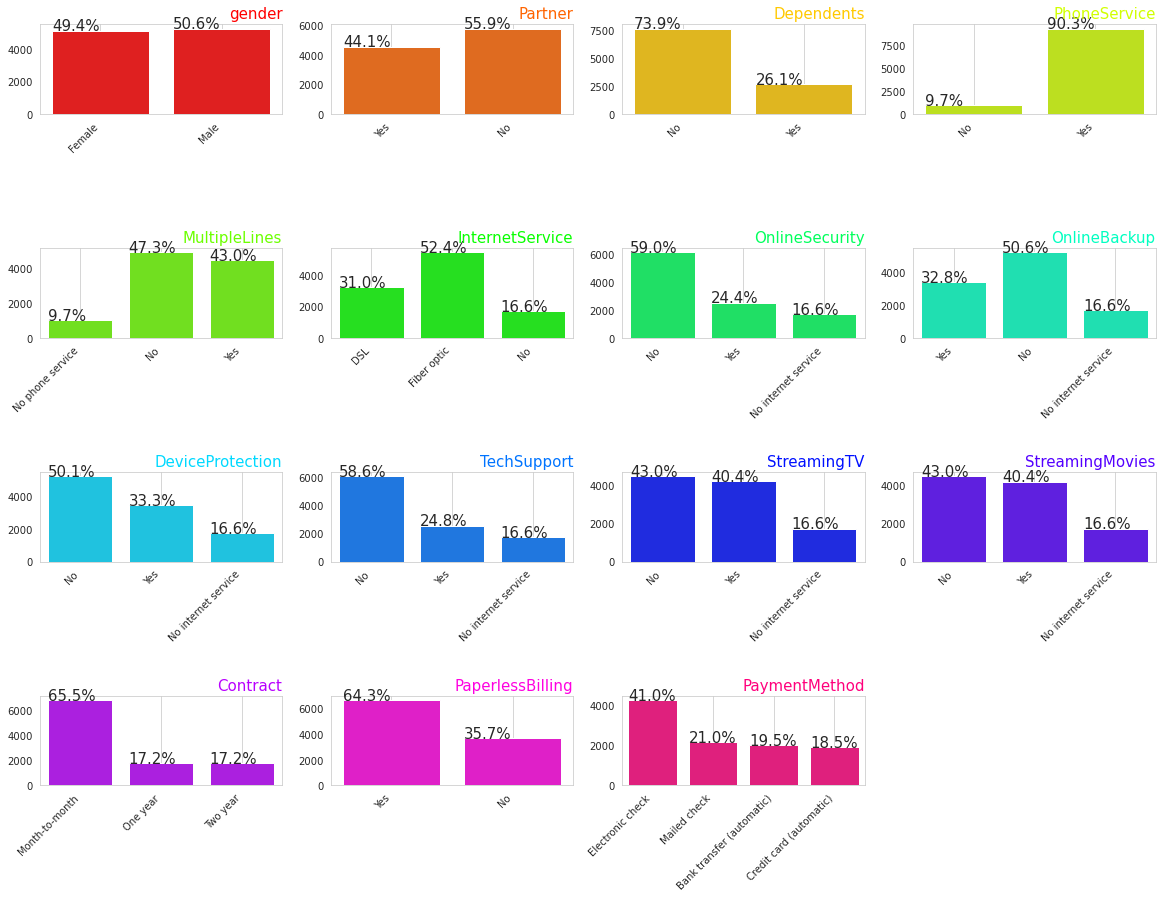

In [25]:
plot_cat_count_df(X_over.select_dtypes(exclude=np.number), h_count=4)

10348 (Churn)


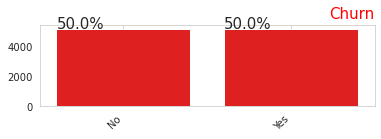

In [26]:
plot_cat_count_s(y_over)

---

Можно указать значение с плавающей запятой (float), чтобы указать соотношение примеров класса меньшинства к классам большинства в преобразованном наборе данных.

При `sampling_strategy=0.5` класс меньшинства получит половину количества примеров по сравнению с классом большинства для задач двоичной классификации.

Это означает, что если бы класс большинства имел 1000 примеров, а класс меньшинства - 100, преобразованный набор данных имел бы 500 примеров класса меньшинства.

In [27]:
over_sample = imblearn.over_sampling.RandomOverSampler(sampling_strategy=0.8)
over_sample

RandomOverSampler(sampling_strategy=0.8)

In [28]:
X_over, y_over = over_sample.fit_resample(X, y)

9313 (gender)
9313 (Partner)
9313 (Dependents)
9313 (PhoneService)
9313 (MultipleLines)
9313 (InternetService)
9313 (OnlineSecurity)
9313 (OnlineBackup)
9313 (DeviceProtection)
9313 (TechSupport)
9313 (StreamingTV)
9313 (StreamingMovies)
9313 (Contract)
9313 (PaperlessBilling)
9313 (PaymentMethod)


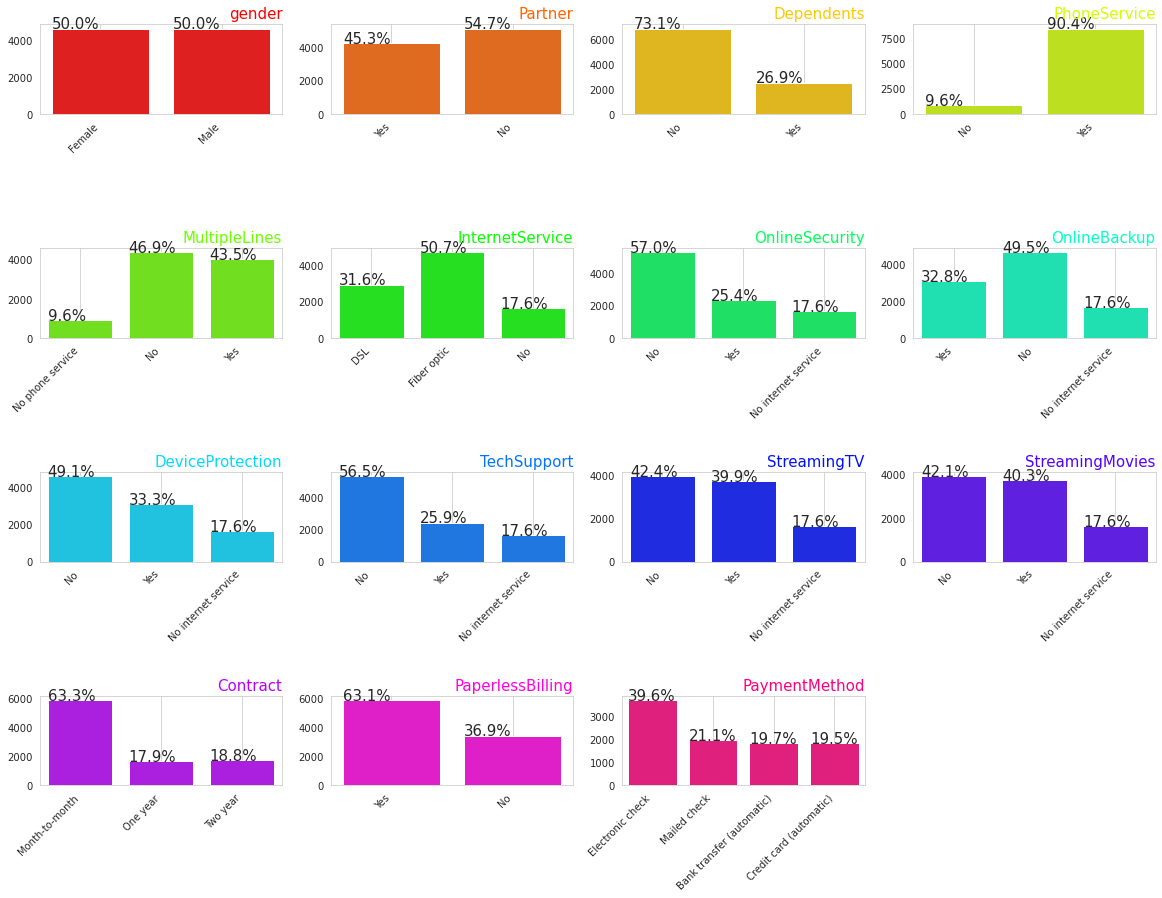

In [29]:
plot_cat_count_df(X_over.select_dtypes(exclude=np.number), h_count=4)

9313 (Churn)


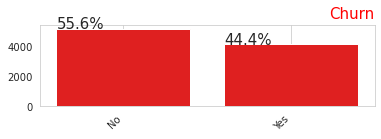

In [30]:
plot_cat_count_s(y_over)

##### `under_sampling`

Класс `RandomUnderSampler` можно использовать так же, как класс `RandomOverSampler` в предыдущем разделе, за исключением того, что стратегии влияют на класс большинства, а не на класс меньшинства. 

Например, установка аргумента `sampling_strategy='majority'` приведет к снижению выборки класса большинства (класс с наибольшим количеством примеров).

Например, набор данных с 1000 примерами в классе большинства и 100 примерами в классе меньшинства будет преобразован так, что оба класса будут иметь 100 примеров в преобразованном наборе  данных.

In [31]:
under_sample = imblearn.under_sampling.RandomUnderSampler(sampling_strategy='majority')
under_sample

RandomUnderSampler(sampling_strategy='majority')

In [32]:
X_under, y_under = under_sample.fit_resample(X, y)

3738 (gender)
3738 (Partner)
3738 (Dependents)
3738 (PhoneService)
3738 (MultipleLines)
3738 (InternetService)
3738 (OnlineSecurity)
3738 (OnlineBackup)
3738 (DeviceProtection)
3738 (TechSupport)
3738 (StreamingTV)
3738 (StreamingMovies)
3738 (Contract)
3738 (PaperlessBilling)
3738 (PaymentMethod)


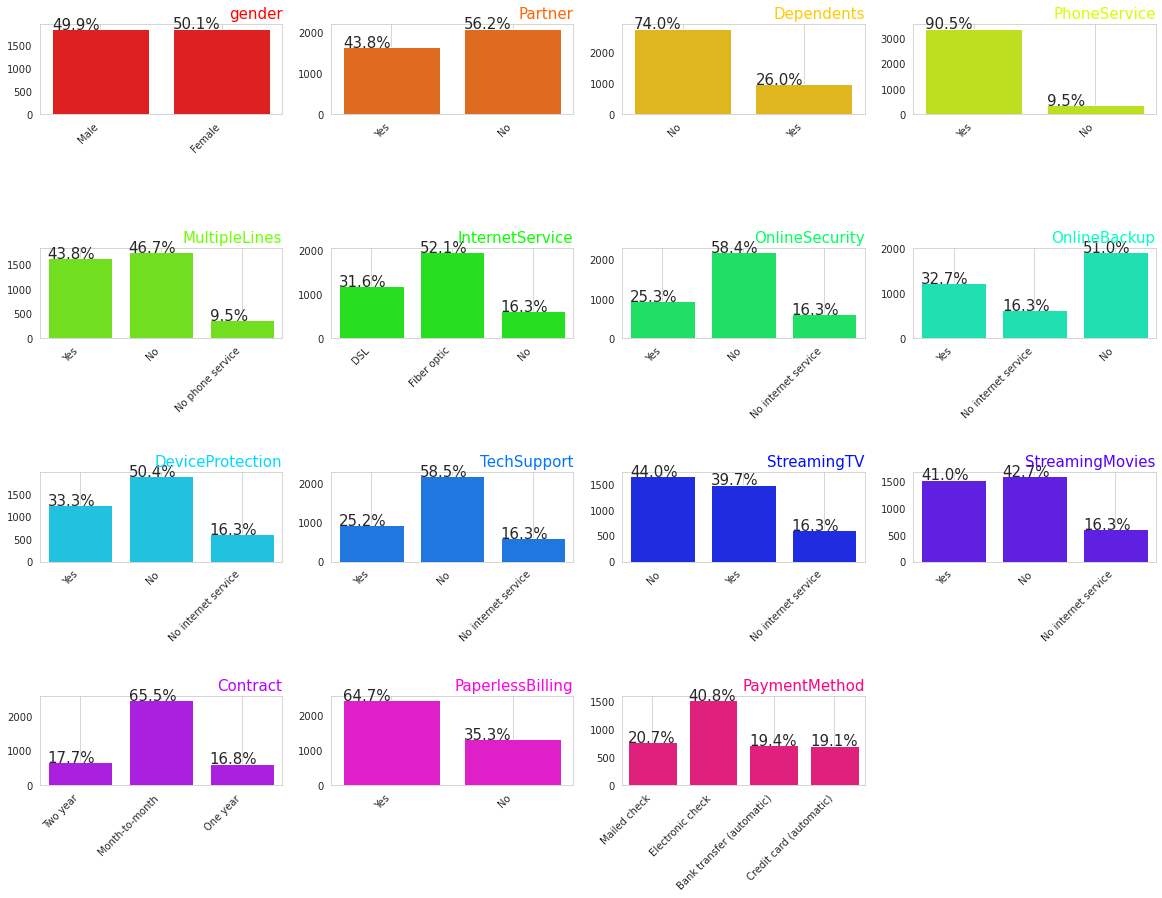

In [33]:
plot_cat_count_df(X_under.select_dtypes(exclude=np.number), h_count=4)

3738 (Churn)


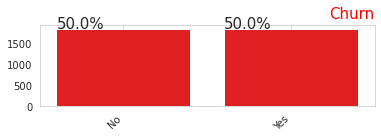

In [34]:
plot_cat_count_s(y_under)

---

Можно установить аргумент `sampling_strategy` в значение с плавающей запятой, которое будет процентным соотношением по отношению к классу меньшинства, в частности, количество примеров в классе меньшинства, деленное на количество примеров в классе большинства.

Например, если мы установим `sampling_strategy=0.5` в несбалансированном наборе данных с 1000 примеров в классе большинства и 100 примерами в классе меньшинства, то в преобразованном наборе данных будет 200 примеров для класса большинства (или 100/200 = 0.5).

In [35]:
over_sample = imblearn.over_sampling.RandomOverSampler(sampling_strategy=0.5)
over_sample

RandomOverSampler(sampling_strategy=0.5)

In [36]:
X_over, y_over = over_sample.fit_resample(X, y)

7761 (gender)
7761 (Partner)
7761 (Dependents)
7761 (PhoneService)
7761 (MultipleLines)
7761 (InternetService)
7761 (OnlineSecurity)
7761 (OnlineBackup)
7761 (DeviceProtection)
7761 (TechSupport)
7761 (StreamingTV)
7761 (StreamingMovies)
7761 (Contract)
7761 (PaperlessBilling)
7761 (PaymentMethod)


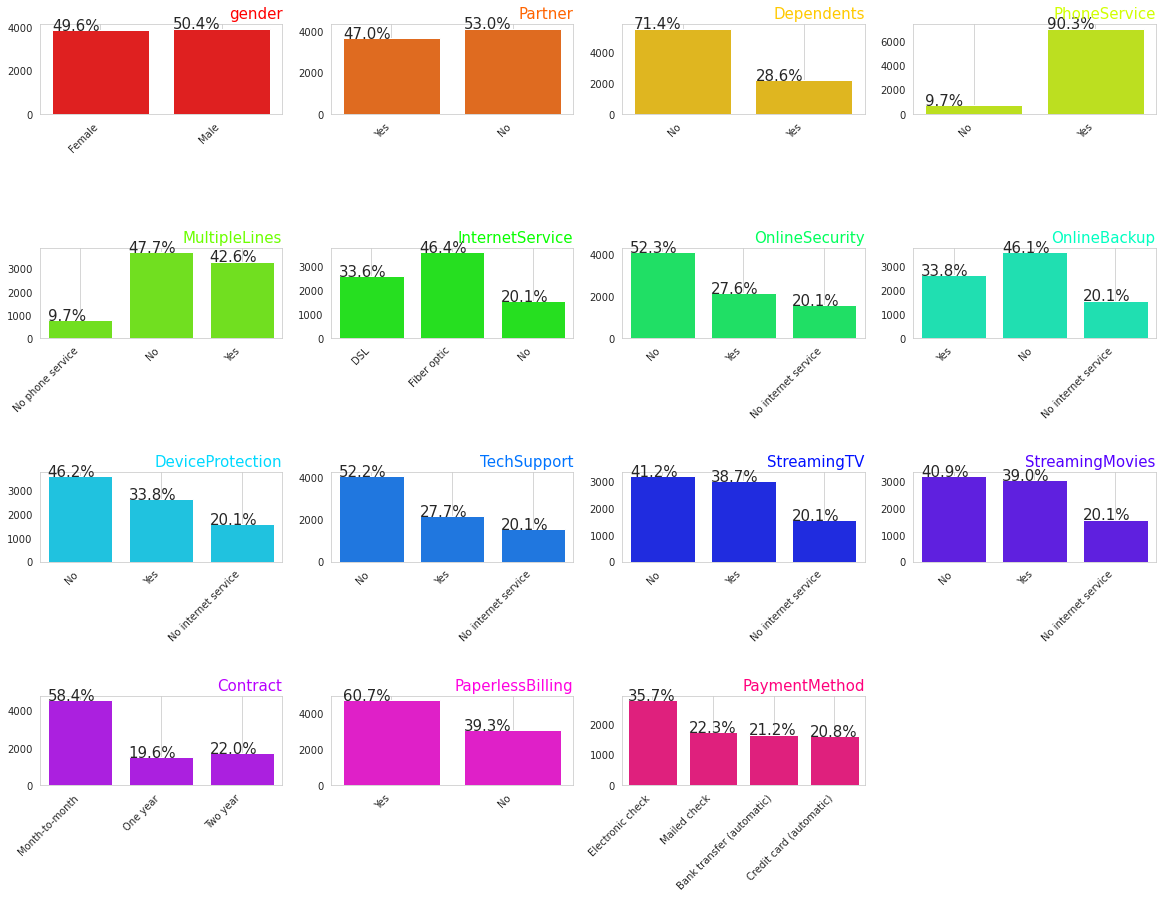

In [37]:
plot_cat_count_df(X_over.select_dtypes(exclude=np.number), h_count=4)

7761 (Churn)


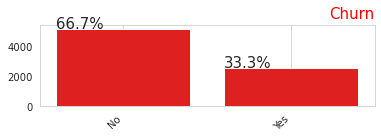

In [38]:
plot_cat_count_s(y_over)

### Создать синтетическую выборку

- Простой способ создания синтетических выборок — это случайная выборка из экземпляров класса меньшинства (minority class).

- Можно выбрать их эмпирически в своем наборе данных или использовать такой метод, как *[Наивный Байес (Naive Bayes)](https://ru.wikipedia.org/wiki/%D0%9D%D0%B0%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9_%D0%B1%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80), который может выбирать каждый атрибут независимо при выполнении в обратном порядке (reverse). Будет больше данных и они будут разнообразнее, но нелинейные отношения между атрибутами могут не сохраниться.

- Существуют "систематические (systematic)" алгоритмы, которые можно использовать для создания синтетических выборок. 
    - Самый популярный из таких алгоритмов называется [*`SMOTE` (Synthetic Minority Over-sampling Technique)](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis#SMOTE).
    - `SMOTE` работает путем создания синтетических выборок из класса меньшинства (minor class) вместо создания копий.
    - Алгоритм `SMOTE` выбирает два или более похожих экземпляров (с использованием меры расстояния) и изменяет один атрибут выборки за раз на случайную величину в пределах разницы с соседними экземплярами.
    - Существует ряд реализаций алгоритма `SMOTE`, например, для Python можно рассмотреть [`imbalanced-learn`](https://github.com/scikit-learn-contrib/imbalanced-learn).
        - Согласно документации `SMOTE` еще не поддерживает категориальные данные в Python.
        - Можно использовать обходной путь, при котором категориальные переменные преобразуются в целые числа и используется `SMOTE`.
    
<img src="images/SMOTE.png">

### Пробовать разные алгоритмы

Настоятельно рекомендуется не использовать свой любимый алгоритм для каждой задачи.

По крайней мере, необходимо проверять различные типы алгоритмов для решения конкретной проблемы.
См. статьи на тему "spot-checking algorithms".

### Попробовать модели со штрафами (Penalized Models)

Можно использовать те же алгоритмы, но дать им другой взгляд на проблему.

Штрафная классификация накладывает дополнительную плату на модель за ошибки классификации в классе меньшинства во время обучения. 
Эти штрафы могут вынудить модель уделять больше внимания классу меньшинства.

Часто обработка штрафов классов или весов зависит от алгоритма обучения.

Существуют штрафные версии алгоритмов, такие как штрафной [SVM](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%BF%D0%BE%D1%80%D0%BD%D1%8B%D1%85_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BE%D0%B2) (penalized-SVM) и штрафной *[LDA](https://ru.wikipedia.org/wiki/%D0%9B%D0%B0%D1%82%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%89%D0%B5%D0%BD%D0%B8%D0%B5_%D0%94%D0%B8%D1%80%D0%B8%D1%85%D0%BB%D0%B5) (penalized-LDA).

Применение штрафов желательно, если вы привязаны к определенному алгоритму и не можете выполнить ресемплинг или получаете плохие результаты. Это еще один способ "сбалансировать" классы. 

Настройка матрицы штрафов может быть сложной. 

Скорее всего, придется попробовать различные схемы штрафов и посмотреть, что лучше всего подходит для конкретной проблемы.

### Попробуйте посмотреть с другой точки зрения

Есть области исследований, посвященные несбалансированным наборам данных. У них есть свои алгоритмы, меры и терминология.

Два подхода, которые важно рассмотреть, - это **обнаружение аномалий (anomaly detection)** и **обнаружение изменений (change detection)**.

**Обнаружение аномалий** - это обнаружение редких событий. Это может быть неисправность машины (вибрация/звуки), или злонамеренная активность программы (последовательность ее системных вызовов). События редки и по сравнению с нормальной работой.

**Обнаружение изменений** похоже на обнаружение аномалий, за исключением того, что вместо поиска аномалии оно ищет изменение или отличие. Это может быть изменение поведения пользователя, наблюдаемое по шаблонам использования или банковским транзакциям.

Оба подхода в большей степени относятся к проблеме классификации в реальном времени, что может дать некоторые новые способы осмысления проблемы и, возможно, еще несколько методов, которые можно попробовать.

### Попробуйте проявить творческий подход

По-настоящему углубитесь в тематику проблемы и подумайте, как разбить ее на более мелкие проблемы, которые легче решить.

Для вдохновения взгляните на очень креативные ответы на `Quora` на вопрос ["Как вы справляетесь с несбалансированной обучающей выборкой при классификации?"](https://www.quora.com/In-classification-how-do-you-handle-an-unbalanced-training-set)

Например: 
- Разложите свой больший класс на меньшее количество других классов… 
- … Использовать классификатор с одним классом… (например, рассматривать как обнаружение выбросов) 
- … Ресемплинг несбалансированной обучающей выборки не в одну сбалансированную, а в несколько. Запуск ансамбля классификаторов на этих наборах может дать гораздо лучший результат, чем один классификатор.

Это всего лишь несколько интересных и креативных идей, которые можно попробовать.

Для получения дополнительных идей ознакомьтесь с этими комментариями к сообщению `Reddit` ["Классификация, когда 80% моей обучающей выборки относится к одному классу"](https://www.reddit.com/r/MachineLearning/comments/12evgi/classification_when_80_of_my_training_set_is_of/).